In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# path of log data
log_path = "../work_dirs/KNet/20240601_191045/vis_data/scalars.json"

In [4]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [5]:
eval(json_list[4])

{'base_lr': 2.3999999999999953e-05,
 'lr': 2.3999999999999953e-05,
 'data_time': 0.004446649551391601,
 'grad_norm': 18.96207914352417,
 'loss': 0.9169559001922607,
 'decode.loss_ce.s0': 0.3816751927137375,
 'decode.acc_seg.s0': 94.703125,
 'decode.loss_ce.s1': 0.11563792303204537,
 'decode.acc_seg.s1': 94.8980712890625,
 'decode.loss_ce.s2': 0.1312304124236107,
 'decode.acc_seg.s2': 91.4051513671875,
 'decode.loss_ce.s3': 0.14877761378884316,
 'decode.acc_seg.s3': 90.5108642578125,
 'aux.loss_ce': 0.13963476046919823,
 'aux.acc_seg': 92.568115234375,
 'time': 1.0241971969604493,
 'iter': 400,
 'memory': 11441,
 'step': 400}

In [6]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'aAcc' in each:
        df_test = pd.concat([df_test, pd.DataFrame.from_records([eval(each)])], ignore_index=True)
    else:
        df_train = pd.concat([df_train, pd.DataFrame.from_records([eval(each)])],  ignore_index=True)

In [7]:
df_train.head()

,base_lr,lr,data_time,grad_norm,loss,decode.loss_ce.s0,decode.acc_seg.s0,decode.loss_ce.s1,decode.acc_seg.s1,decode.loss_ce.s2,decode.acc_seg.s2,decode.loss_ce.s3,decode.acc_seg.s3,aux.loss_ce,aux.acc_seg,time,iter,memory,step
0,0.000003,0.000003,0.005054,315.103600,4.369603,0.999245,31.759644,0.998488,47.008789,0.928190,44.094971,1.059261,53.921387,0.384418,49.021729,0.966075,56,12637,56
1,0.000006,0.000006,0.005119,241.451684,3.719837,1.040468,37.319332,0.693868,71.285187,0.723959,73.251869,0.876335,78.304367,0.385206,53.023037,0.994769,100,11441,100
2,0.000012,0.000012,0.004203,87.280351,2.161279,0.878658,62.096340,0.305934,87.636703,0.316990,86.504356,0.365966,84.929031,0.293731,85.442780,1.014394,200,11441,200
3,0.000018,0.000018,0.006260,42.923438,1.661217,0.759989,83.548218,0.204381,94.441528,0.230262,95.103149,0.225286,96.277588,0.241300,89.231812,1.022858,300,11441,300
4,0.000024,0.000024,0.004447,18.962079,0.916956,0.381675,94.703125,0.115638,94.898071,0.131230,91.405151,0.148778,90.510864,0.139635,92.568115,1.024197,400,11441,400


In [8]:
df_test.head()

,aAcc,mIoU,mAcc,mDice,mFscore,mPrecision,mRecall,data_time,time,step
0,96.38,89.60,93.90,94.46,94.46,95.04,93.90,0.111727,0.600436,500
1,97.46,93.08,95.61,96.39,96.39,97.20,95.61,0.015217,0.307555,1000
2,97.64,94.08,96.85,96.92,96.92,96.99,96.85,0.013736,0.308217,1500
3,97.43,93.68,96.21,96.69,96.69,97.22,96.21,0.014223,0.307253,2000
4,97.69,94.14,96.55,96.95,96.95,97.37,96.55,0.018058,0.282379,2500


In [9]:
# ***********************************************************************************
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = 2
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

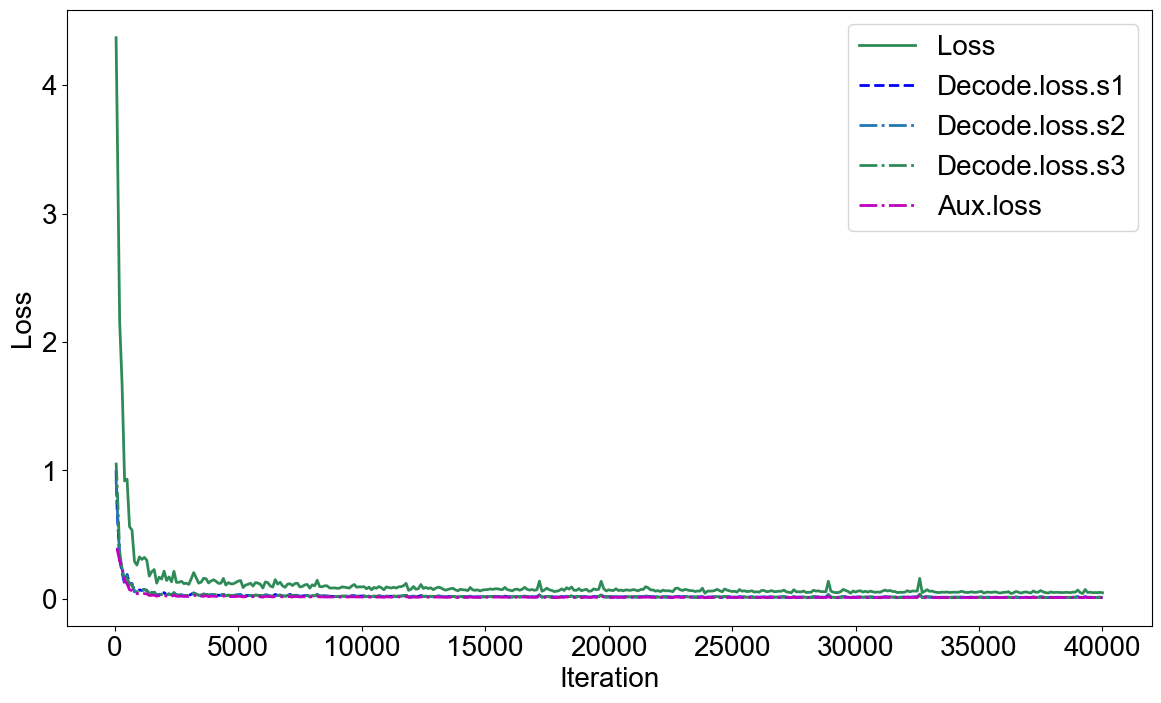

In [10]:
train_metrics = ['loss', 'decode.loss_ce.s1', 'decode.loss_ce.s2', 'decode.loss_ce.s3', 'aux.loss_ce']
figure, ax = plt.subplots(figsize=(14, 8))

x = df_train['step']
for y in train_metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

# ticklabel
plt.tick_params(labelsize=20)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]

# xlabel and ylabel
font_label = {
    'family' : 'Arial',
    'weight' : 'normal',
    'size'   : 20,
}
plt.xlabel('Iteration', font_label)
plt.ylabel('Loss', font_label)
# plt.title('', fontsize=25)

# legend
font_legend = {
    'family' : 'Arial',
    'weight' : 'normal',
    'size'   : 20,
}
plt.legend(['Loss','Decode.loss.s1','Decode.loss.s2','Decode.loss.s3','Aux.loss'], prop=font_legend)

# plt.savefig('图表/训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.show()

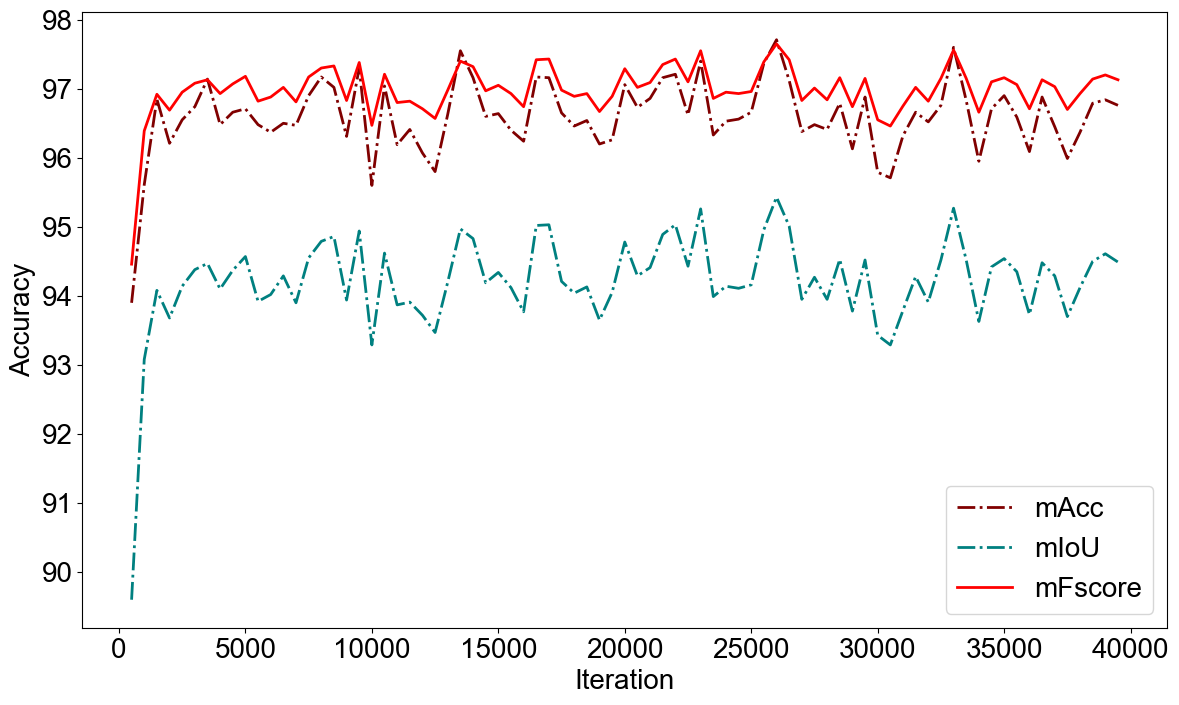

In [11]:
test_metrics = ['mAcc','mIoU', 'mFscore']
figure, ax = plt.subplots(figsize=(14, 8))

x = df_test['step']
for y in test_metrics:
    try:
        plt.plot(x, df_test[y], label=y, **get_line_arg())
    except:
        pass

# ticklabel
plt.tick_params(labelsize=20)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]

# xlabel and ylabel
font_label = {
    'family' : 'Arial',
    'weight' : 'normal',
    'size'   : 20,
}
plt.xlabel('Iteration', font_label)
plt.ylabel('Accuracy', font_label)
# plt.title('', fontsize=25)

# legend
font_legend = {
    'family' : 'Arial',
    'weight' : 'normal',
    'size'   : 20,
}
plt.legend(prop=font_legend)

# plt.savefig('图表/训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.show()

In [13]:
df_train.to_excel("../work_dirs/KNet/20240601_191045/vis_data/training_loss_vis.xlsx")
df_test.to_excel("../work_dirs/KNet/20240601_191045/vis_data/val_loss_vis.xlsx")

## mmyolo

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
# path of log data
# log_path = "../../mmdetection/work_dirs/rock_faster_rcnn/best_run/vis_data/scalars.json"
# log_path = "../work_dirs/rock_cbmyolo_val_loss/20250223_135312/vis_data/scalars.json"
# log_path = "../work_dirs/rock_yolo_val_loss/20250223_165557/vis_data/scalars.json"
log_path = "../../mmdetection/work_dirs/rock_faster_rcnn_val_loss/20250224_181630/vis_data/scalars.json"
# log_path = "../work_dirs/rock_yolo/best_run/vis_data/scalars.json"
# log_path = "../work_dirs/rock_cbmyolo/best_run/vis_data/scalars.json"
with open(log_path, "r") as f:
    json_list = f.readlines()

In [47]:
eval(json_list[4])

{'lr': 0.0003968193385056234,
 'data_time': 0.34429099009587216,
 'loss': 2.903274939610408,
 'loss_rpn_cls': 0.5504197223255267,
 'loss_rpn_bbox': 0.21647237699765426,
 'loss_cls': 1.4622313128067896,
 'acc': 79.58984375,
 'loss_bbox': 0.6741515673123873,
 'time': 1.2443770812107966,
 'epoch': 2,
 'iter': 26,
 'memory': 5430,
 'step': 26}

In [48]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'coco/bbox' in each:
        df_test = pd.concat([df_test, pd.DataFrame.from_records([eval(each)])], ignore_index=True)
    else:
        df_train = pd.concat([df_train, pd.DataFrame.from_records([eval(each)])],  ignore_index=True)

In [49]:
df_train

,lr,data_time,loss,loss_rpn_cls,loss_rpn_bbox,loss_cls,acc,loss_bbox,time,epoch,iter,memory,step
0,0.000063,1.696917,4.656604,1.827583,0.260150,2.044030,8.251953,0.524841,4.757113,1,5,5781,5
1,0.000143,0.850891,4.038054,1.216263,0.252565,1.942330,58.740234,0.626896,2.592948,1,10,6079,10
2,0.000222,0.568302,3.519839,0.851137,0.233587,1.793208,75.878906,0.641906,1.860508,1,15,6079,15
3,0.000302,0.427246,3.169918,0.676485,0.228402,1.609640,75.000000,0.655391,1.490759,1,20,6079,20
4,0.000397,0.344291,2.903275,0.550420,0.216472,1.462231,79.589844,0.674152,1.244377,2,26,5430,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.000010,0.022412,0.200879,0.003239,0.038009,0.053290,98.242188,0.106340,0.424809,399,8378,6079,8378
1596,0.000010,0.032568,0.199006,0.003352,0.037610,0.052471,98.632812,0.105572,0.430079,400,8384,6079,8384
1597,0.000010,0.023741,0.200316,0.003018,0.037529,0.053056,97.753906,0.106713,0.427632,400,8389,5780,8389
1598,0.000010,0.023737,0.200666,0.003042,0.037794,0.052811,98.095703,0.107019,0.429096,400,8394,6079,8394


In [20]:
df_test

,coco/bbox_mAP,coco/bbox_mAP_50,coco/bbox_mAP_75,coco/bbox_mAP_s,coco/bbox_mAP_m,coco/bbox_mAP_l,data_time,time,step
0,0.003,0.013,0.000,0.0,0.000,0.003,0.291922,0.356384,10
1,0.000,0.001,0.000,0.0,0.000,0.000,0.040349,0.062903,20
2,0.048,0.135,0.024,0.0,0.001,0.054,0.046178,0.065862,30
3,0.064,0.170,0.014,0.0,0.003,0.070,0.049009,0.064173,40
4,0.090,0.211,0.047,0.0,0.007,0.097,0.059818,0.078597,50
5,0.129,0.268,0.105,0.0,0.019,0.143,0.050543,0.064231,60
6,0.125,0.283,0.081,0.0,0.021,0.138,0.048465,0.062327,70
7,0.139,0.287,0.108,0.0,0.025,0.157,0.050418,0.063668,80
8,0.164,0.313,0.162,0.0,0.019,0.185,0.052165,0.067331,90
9,0.189,0.352,0.201,0.0,0.036,0.209,0.049281,0.062065,100


In [21]:
# ***********************************************************************************
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = 2
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

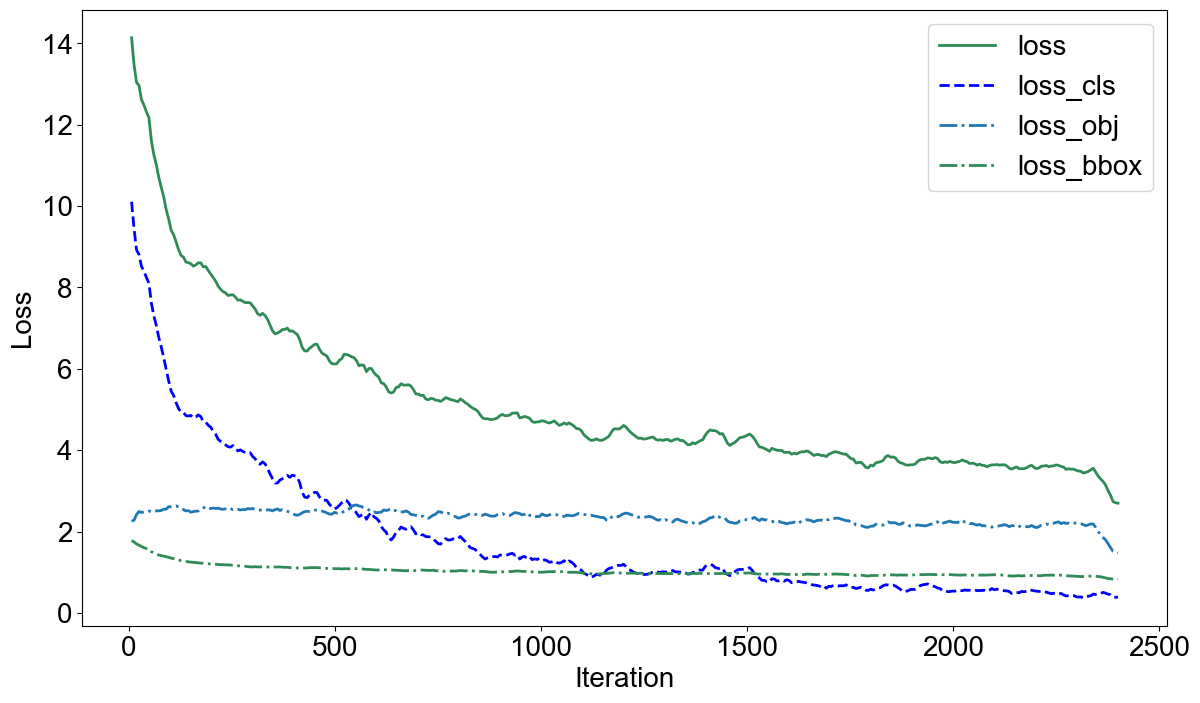

In [22]:
train_metrics = ['loss', 'loss_cls', 'loss_obj', 'loss_bbox']
figure, ax = plt.subplots(figsize=(14, 8))

x = df_train['step']
for y in train_metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

# ticklabel
plt.tick_params(labelsize=20)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]

# xlabel and ylabel
font_label = {
    'family' : 'Arial',
    'weight' : 'normal',
    'size'   : 20,
}
plt.xlabel('Iteration', font_label)
plt.ylabel('Loss', font_label)
# plt.title('', fontsize=25)

# legend
font_legend = {
    'family' : 'Arial',
    'weight' : 'normal',
    'size'   : 20,
}
plt.legend(['loss', 'loss_cls', 'loss_obj', 'loss_bbox'], prop=font_legend)

# plt.savefig('图表/训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.show()

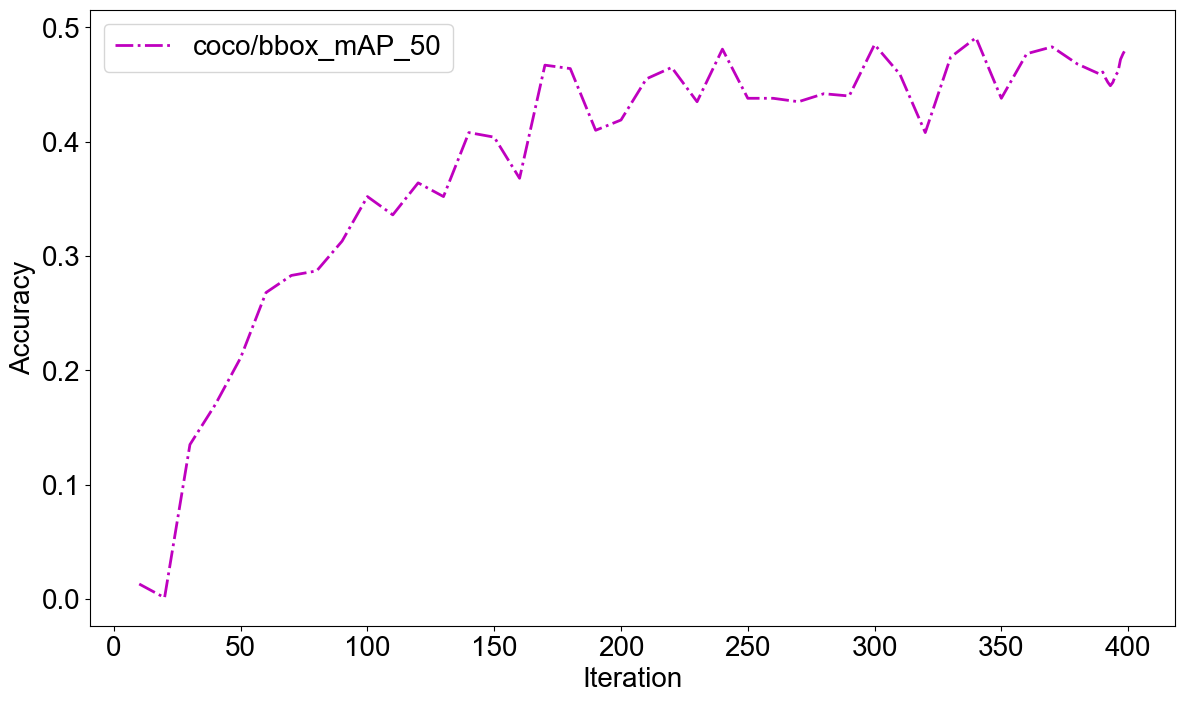

In [23]:
test_metrics = ['coco/bbox_mAP_50']
figure, ax = plt.subplots(figsize=(14, 8))

x = df_test['step']
for y in test_metrics:
    try:
        plt.plot(x, df_test[y], label=y, **get_line_arg())
    except:
        pass

# ticklabel
plt.tick_params(labelsize=20)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]

# xlabel and ylabel
font_label = {
    'family' : 'Arial',
    'weight' : 'normal',
    'size'   : 20,
}
plt.xlabel('Iteration', font_label)
plt.ylabel('Accuracy', font_label)
# plt.title('', fontsize=25)

# legend
font_legend = {
    'family' : 'Arial',
    'weight' : 'normal',
    'size'   : 20,
}
plt.legend(prop=font_legend)

# plt.savefig('图表/训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.show()

In [106]:
df_train.to_excel("../../mmdetection/work_dirs/rock_faster_rcnn/best_run/vis_data/training_loss_vis.xlsx")
df_test.to_excel("../../mmdetection/work_dirs/rock_faster_rcnn/best_run/vis_data/val_loss_vis.xlsx")

In [51]:
# df_train.to_excel("../work_dirs/rock_cbmyolo_val_loss/20250223_135312/vis_data/training_loss_vis.xlsx")
# df_train.to_excel("../work_dirs/rock_yolo_val_loss/20250223_165557/vis_data/training_loss_vis.xlsx")
df_train.to_excel("../../mmdetection/work_dirs/rock_faster_rcnn_val_loss/20250224_181630/vis_data/val_loss_vis.xlsx")